In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import model_from_json


input_encoder = Input(shape=(28, 28, 1))
input_decoder = Input(shape=(4, 4, 4))


def custom_activation(x):
    return (K.sigmoid(x) * 3) 

with open('decoder.json', 'r') as f:
    decoder = model_from_json(f.read())
    decoder.load_weights("decoder.h5")
    
with open('encoder.json', 'r') as f:
    encoder = model_from_json(f.read())
    encoder.load_weights("encoder.h5")
    
with open('autoencoder.json', 'r') as f:
    autoencoder = model_from_json(f.read())
    autoencoder.load_weights("autoencoder.h5")
    
with open('generator.json', 'r') as f:
    generator = model_from_json(f.read(), {'custom_activation': custom_activation})
    generator.load_weights("generator.h5")

with open('discriminator.json', 'r') as f:
    discriminator = model_from_json(f.read())
    discriminator.load_weights("discriminator.h5")

/home/ganimedes/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_train = encoder.predict(x_train)

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 4, 4, 4)
(60000,)


(64, 5923)


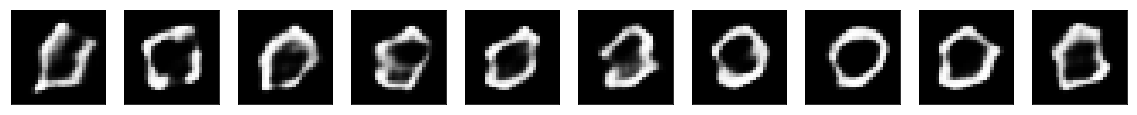

In [4]:
plot = [[] for a in range(64)]
for a, b in zip(x_train, y_train):
    if b == 0:
        a = a.flatten()
        for x in range(64):
            plot[x].append(a[x])
#plot = np.array(plot)
#plot = plot.flatten()
#plt.xlim(0, 4)
#plt.hist(plot, normed=True, bins=20)
#plt.show()

plot = np.array(plot)
print(plot.shape)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = [np.random.choice(plot[a], 1) for a in range(64)]
    img = np.array(img)
    img = decoder.predict(img.reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

(64, 60000)


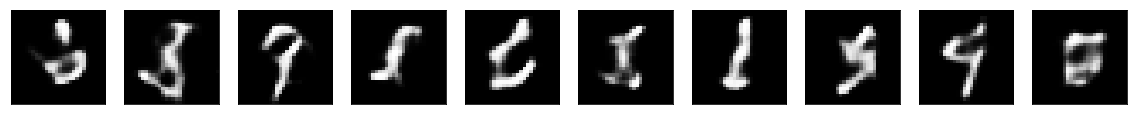

In [5]:
plot = [[] for a in range(64)]
for a, b in zip(x_train, y_train):
    a = a.flatten()
    for x in range(64):
        plot[x].append(a[x])

#plot = np.array(plot[20])
#plot = plot.flatten()
#plt.xlim(0, 4)
#plt.hist(plot, normed=True, bins=20)
#plt.show()

plot = np.array(plot)
print(plot.shape)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = [np.random.choice(plot[a], 1) for a in range(64)]
    img = np.array(img)
    img = decoder.predict(img.reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()


In [6]:
from sklearn import mixture

(x_train, y_train), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_train = encoder.predict(x_train)

In [7]:
print(x_train.shape)

(60000, 4, 4, 4)


In [8]:
x_train = x_train.reshape(60000, 64)

In [ ]:
clf = mixture.GaussianMixture(n_components=10, covariance_type='full')
clf.fit(x_train)

In [ ]:
a = clf.sample(20)
sample = np.array(a[0])
print(sample.shape)

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = decoder.predict(np.array((clf.sample(1))[0]).reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

In [9]:
from sklearn import mixture

(x_train, y_train), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_train = encoder.predict(x_train)

data_gmm = x_train.reshape(x_train.shape[0], -1)

clf = []
for i in range(10):
    clf.append(mixture.GaussianMixture(n_components=10, covariance_type='full'))
    result = []
    for a, b in zip(data_gmm, y_train):
        if b == i:
            result.append(a)
    data_train = np.array(result)
    clf[i].fit(data_train)

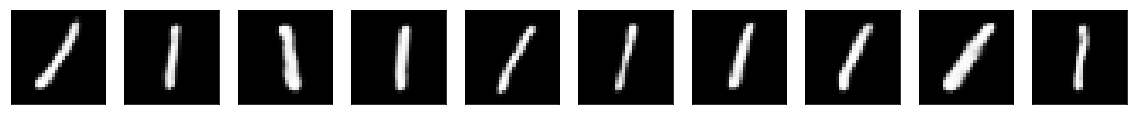

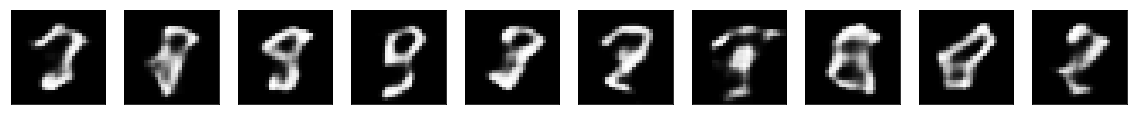

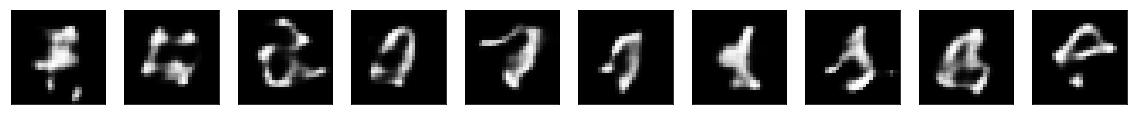

In [10]:
def gmm_generator(samples_count, class_type):
    a = clf[class_type].sample(samples_count)
    sample = np.array(a[0])
    return sample


def cluster_per_feature_class_generator(samples_count, class_type):
    data = x_train.reshape(x_train.shape[0], -1)
    result = []
    for a, b in zip(data, y_train):
        if b == class_type:
            result.append(a)
    data = np.array(result).T
    result = []
    for a in data:
        result.append(np.random.choice(a, samples_count))
    result = np.array(result)
    result = result.T
    return result
            
def cluster_per_feature_generator(samples_count):
    data = x_train.reshape(x_train.shape[0], -1)
    data = data.T
    result = []
    for a in data:
        result.append(np.random.choice(a, samples_count))
    result = np.array(result)
    result = result.T
    return result


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = decoder.predict(gmm_generator(1, 1).reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = decoder.predict(cluster_per_feature_class_generator(1, 8).reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    img = decoder.predict(cluster_per_feature_generator(1).reshape(1, 4, 4, 4)).reshape(28, 28)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()

In [11]:
generator_count = 4

real_x = x_train.reshape(x_train.shape[0], -1)

def prepare_data_same_ratio_of_generators(dim):
    samples_per_generator_count = dim // generator_count
    data_x = np.concatenate([real_x[:samples_per_generator_count], cluster_per_feature_generator(samples_per_generator_count)])
    for _class in range(10):
        data_x = np.concatenate([data_x, gmm_generator(samples_per_generator_count // 10, _class), cluster_per_feature_class_generator(samples_per_generator_count // 10, _class)])
    data_y = np.concatenate([np.ones(samples_per_generator_count), np.zeros((generator_count - 1)*samples_per_generator_count)])
    s = np.arange(data_x.shape[0])
    np.random.shuffle(s)
    return data_x[s], data_y[s]

def prepare_data_same_count_of_fakes_to_real(dim):
    samples_per_generator_count = (dim // 2) // (generator_count - 1)
    data_x = np.concatenate([real_x[:dim // 2], cluster_per_feature_generator(samples_per_generator_count)])
    for _class in range(10):
        data_x = np.concatenate([data_x, gmm_generator(samples_per_generator_count // 10, _class), cluster_per_feature_class_generator(samples_per_generator_count // 10, _class)])
    data_y = np.concatenate([np.ones(dim // 2), np.zeros(dim // 2)])
    s = np.arange(data_x.shape[0])
    np.random.shuffle(s)
    return data_x[s], data_y[s]
    

In [ ]:
train_x, train_y = prepare_data_same_ratio_of_generators(60000)
validate_x, validate_y = prepare_data_same_ratio_of_generators(10000)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = SVC()
clf.fit(train_x, train_y)
predictions = clf.predict(validate_x)
print(accuracy_score(validate_y, predictions))
print(confusion_matrix(validate_y, predictions))
print(classification_report(validate_y, predictions))

clf = discriminator
predictions = clf.predict(validate_x)
print(predictions)
predictions = np.round(predictions, 0)
print(predictions)
print(accuracy_score(validate_y, predictions))
print(confusion_matrix(validate_y, predictions))
print(classification_report(validate_y, predictions))

In [12]:
train_x, train_y = prepare_data_same_count_of_fakes_to_real(60000)
validate_x, validate_y = prepare_data_same_count_of_fakes_to_real(10000)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = SVC()
clf.fit(train_x, train_y)
predictions = clf.predict(validate_x)
print(accuracy_score(validate_y, predictions))
print(confusion_matrix(validate_y, predictions))
print(classification_report(validate_y, predictions))

clf = discriminator
predictions = clf.predict(validate_x)
print(predictions)
predictions = np.round(predictions, 0)
print(predictions)
print(accuracy_score(validate_y, predictions))
print(confusion_matrix(validate_y, predictions))
print(classification_report(validate_y, predictions))

0.83026236731424
[[3291 1695]
 [   0 5000]]
             precision    recall  f1-score   support

        0.0       1.00      0.66      0.80      4986
        1.0       0.75      1.00      0.86      5000

avg / total       0.87      0.83      0.83      9986

[[0.42442426]
 [0.47409132]
 [0.17689137]
 ...
 [0.4361495 ]
 [0.18152593]
 [0.6279709 ]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]
0.7031844582415382
[[4436  550]
 [2414 2586]]
             precision    recall  f1-score   support

        0.0       0.65      0.89      0.75      4986
        1.0       0.82      0.52      0.64      5000

avg / total       0.74      0.70      0.69      9986



In [17]:
clf.compile(optimizer='adadelta', loss='binary_crossentropy')
clf.fit(train_x, train_y,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(validate_x, validate_y))

Train on 60000 samples, validate on 9986 samples
Epoch 1/30
60000/60000 [==============================] - 4s - loss: 0.2464 - val_loss: 0.2615
Epoch 2/30
60000/60000 [==============================] - 3s - loss: 0.2377 - val_loss: 0.2530
Epoch 3/30
60000/60000 [==============================] - 3s - loss: 0.2308 - val_loss: 0.2430
Epoch 4/30
60000/60000 [==============================] - 3s - loss: 0.2239 - val_loss: 0.2386
Epoch 5/30
60000/60000 [==============================] - 3s - loss: 0.2180 - val_loss: 0.2378
Epoch 6/30
60000/60000 [==============================] - 3s - loss: 0.2130 - val_loss: 0.2740
Epoch 7/30
60000/60000 [==============================] - 3s - loss: 0.2073 - val_loss: 0.2332
Epoch 8/30
60000/60000 [==============================] - 3s - loss: 0.2020 - val_loss: 0.2196
Epoch 9/30
60000/60000 [==============================] - 3s - loss: 0.1962 - val_loss: 0.2187
Epoch 10/30
60000/60000 [==============================] - 3s - loss: 0.1921 - val_loss: 0.2149


In [18]:
predictions = clf.predict(validate_x)
print(predictions)
predictions = np.round(predictions, 0)
print(predictions)
print(accuracy_score(validate_y, predictions))
print(confusion_matrix(validate_y, predictions))
print(classification_report(validate_y, predictions))

[[9.9735200e-01]
 [7.4263155e-01]
 [1.1906795e-05]
 ...
 [8.6165988e-01]
 [1.3522867e-05]
 [9.7655767e-01]]
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
0.9286000400560785
[[4535  451]
 [ 262 4738]]
             precision    recall  f1-score   support

        0.0       0.95      0.91      0.93      4986
        1.0       0.91      0.95      0.93      5000

avg / total       0.93      0.93      0.93      9986



In [19]:
clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)
predictions = clf.predict(validate_x)
print(accuracy_score(validate_y, predictions))
print(confusion_matrix(validate_y, predictions))
print(classification_report(validate_y, predictions))

0.946525135189265
[[4452  534]
 [   0 5000]]
             precision    recall  f1-score   support

        0.0       1.00      0.89      0.94      4986
        1.0       0.90      1.00      0.95      5000

avg / total       0.95      0.95      0.95      9986

